<a href="https://colab.research.google.com/github/Fucksky-Zhao/ForumTextAnalysis/blob/master/ForumTextAnalysis/textAnalysis/FinalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

chineseStopWords.txt  item_spdb_utf_8.csv  用户中介作用示意图.jpg
df_cmb_relation.csv   lufei.jpeg	   用户关系图.jpg
FinalAnalysis.ipynb   simkai.ttf
item_cmb_utf_8.csv    userdict.txt


In [0]:
# 指定当前的工作文件夹
import os

# 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
os.chdir("./drive/My Drive/FinalReport") 

In [0]:
!ls

chineseStopWords.txt  FinalAnalysis.ipynb  item_spdb_utf_8.csv	simkai.ttf
df_cmb_relation.csv   item_cmb_utf_8.csv   lufei.jpeg		userdict.txt


In [0]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import GridSearchCV

In [0]:
df_cmb = pd.read_csv("item_cmb_utf_8.csv", error_bad_lines=False, encoding='utf-8', header=None, names=['author', 'content','post_time', 'title', 'url'])
print(df_cmb.shape)
df_cmb.info()

(273159, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273159 entries, 0 to 273158
Data columns (total 5 columns):
author       273159 non-null object
content      263151 non-null object
post_time    273159 non-null object
title        273159 non-null object
url          273159 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


In [0]:
df_cmb.head()

,author,content,post_time,title,url
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html
3,chensy2009,NaN,2019-3-22 00:09:33,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html


In [0]:
df_cmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273159 entries, 0 to 273158
Data columns (total 5 columns):
author       273159 non-null object
content      263151 non-null object
post_time    273159 non-null object
title        273159 non-null object
url          273159 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


# 按照时间排序

In [0]:
df_cmb['time'] = pd.to_datetime(df_cmb['post_time'],format='%Y-%m-%d %H:%M:%S')
df_cmb.sort_values(by='time')

,author,content,post_time,title,url,time
208888,ppyy,存了5万后，第2天可以转走吗？？如果日均达不到5万会不会收费？？金卡有什么好处？？,2013-4-30 11:27:00,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 11:27:00
208901,wf_615,问错地方了....招行板块,2013-4-30 11:37:21,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 11:37:21
208902,ppyy,打错了，是问招行的。,2013-4-30 11:40:57,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 11:40:57
208919,xjd980844,NaN,2013-4-30 11:46:01,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 11:46:01
208920,ppyy,金卡有什么好处？？,2013-4-30 11:59:44,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 11:59:44
208938,ykj6521,你说的这些都不可以免,2013-4-30 12:02:50,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 12:02:50
208939,51lym6360,招行客户经理给我弄了个移动话费自动续费，就可以免除管理费了，我是刚办下来的，不知是否是这样，...,2013-4-30 12:26:14,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 12:26:14
208957,ppyy,各地的政策不一样吗？怎么大家说的都不一样啊？？,2013-4-30 12:37:49,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 12:37:49
208958,xyh2414,关注下~~~~~,2013-4-30 12:37:54,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 12:37:54
208977,jaychou118,NaN,2013-4-30 12:51:15,招行储蓄卡的金卡，是不是只要存5万，就可以办了？不要求每天平均达到5万了？,https://bbs.51credit.com/thread-1293910-1-1.html,2013-04-30 12:51:15


In [0]:
df_cmb['year'], df_cmb['month'], df_cmb['dayofweek'] = df_cmb['time'].dt.year, df_cmb['time'].dt.month, df_cmb['time'].dt.dayofweek
df_cmb.head()

,author,content,post_time,title,url,time,year,month,dayofweek
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-21 00:45:42,2019,3,3
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,2018-12-24 09:42:05,2018,12,0
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-21 09:43:45,2019,3,3
3,chensy2009,NaN,2019-3-22 00:09:33,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-22 00:09:33,2019,3,4
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,2018-12-24 09:44:07,2018,12,0


In [0]:
df_cmb['year'].value_counts().sort_index(ascending=True)

2013       160
2014       312
2015       716
2016      1825
2017     17492
2018     33702
2019    218952
Name: year, dtype: int64

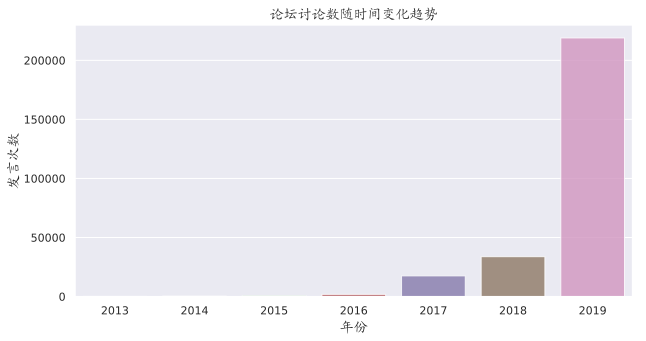

In [0]:
year_count  = df_cmb['year'].value_counts().sort_index(ascending=True)
# city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.set(font="simkai")
ax = sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('论坛讨论数随时间变化趋势',fontproperties=zhfont)
plt.ylabel('发言次数', fontsize=12,fontproperties=zhfont)
plt.xlabel('年份', fontsize=12,fontproperties=zhfont)
# ax.set_xticklabels(['wcc0233', '小貔貅', 'tjmcs', '小豌豆00', '潇洒哥ing', '蓝弟弟', '贫道飞熊', '儒雅的灵魂当铺', 'kashen55573468', '不想糊涂'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
df_cmb['month'].value_counts().sort_index(ascending=True)

1     21548
2     16911
3     27841
4     37725
5     31435
6     37564
7     45876
8     24407
9      1401
10     5940
11     6526
12    15985
Name: month, dtype: int64

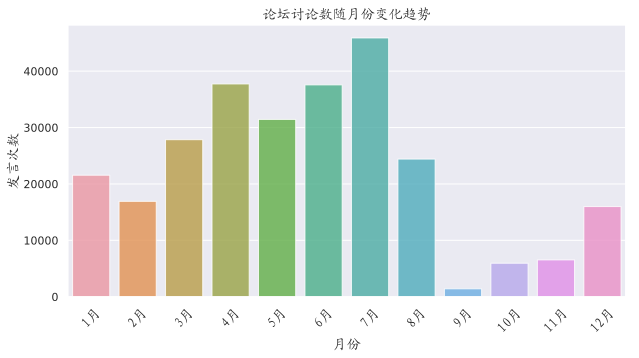

In [0]:
month_count  = df_cmb['month'].value_counts().sort_index(ascending=True)
# city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.set(font="simkai")
ax = sns.barplot(month_count.index, month_count.values, alpha=0.8)
plt.title('论坛讨论数随月份变化趋势',fontproperties=zhfont)
plt.ylabel('发言次数', fontsize=12,fontproperties=zhfont)
plt.xlabel('月份', fontsize=12,fontproperties=zhfont)
ax.set_xticklabels(['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月','11月','12月'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
df_cmb['dayofweek'].value_counts().sort_index(ascending=True)

0    38773
1    40259
2    40401
3    42950
4    41202
5    35320
6    34254
Name: dayofweek, dtype: int64

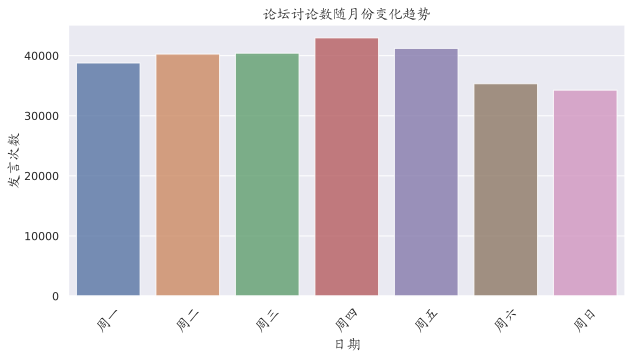

In [0]:
day_count  = df_cmb['dayofweek'].value_counts().sort_index(ascending=True)
# city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.set(font="simkai")
ax = sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('论坛讨论数随月份变化趋势',fontproperties=zhfont)
plt.ylabel('发言次数', fontsize=12,fontproperties=zhfont)
plt.xlabel('日期', fontsize=12,fontproperties=zhfont)
ax.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
# df_cmb_main表示仅仅含有楼主发帖主贴的内容
df_cmb_main = df_cmb.sort_values('post_time', ascending=True).groupby('title', as_index=False).first()

In [0]:
df_cmb_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16887 entries, 0 to 16886
Data columns (total 9 columns):
title        16887 non-null object
author       16887 non-null object
content      16877 non-null object
post_time    16887 non-null object
url          16887 non-null object
time         16887 non-null datetime64[ns]
year         16887 non-null int64
month        16887 non-null int64
dayofweek    16887 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.3+ MB


In [0]:
df_cmb_main.tail(20)

In [0]:
df_cmb.isnull().sum() / df_cmb.shape[0]

author       0.000000
content      0.036638
post_time    0.000000
title        0.000000
url          0.000000
dtype: float64

In [0]:
df_cmb['author'].value_counts()

wcc0233           2001
小貔貅               1795
tjmcs             1188
小豌豆00             1169
潇洒哥ing            1076
蓝弟弟                936
贫道飞熊               908
儒雅的灵魂当铺            809
kashen55573468     794
不想糊涂               791
herscar            751
lxh654             747
小童童童童话丶            730
孤狼asd              715
張儁傑                711
用生命在撸卡             681
数字蚂蚁               662
颂绣华                645
浪翻云                602
清风明月过客归人           590
aduvsjiao          589
潜在的优质客户cd          578
zihan79100384      578
我本卡神王老五            567
花卷不花花              552
kashen85201479     551
骨灰盒好家伙             549
卡圈彭于晏              491
屈臣氏蒸馏水             489
走位走位               486
                  ... 
小王子糊涂                1
toent                1
蜀都小飞侠                1
枫恋红尘                 1
violetdt             1
至尊                   1
szxcaapy             1
大哥大666               1
dzxiumin             1
kUUOqyQtRrZ          1
kashen60611350       1
zw1987zw             1
ximengruyan

In [0]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "http://file3.data.weipan.cn/87016829/e6a4de46faf0c7ba622132eaaad96a291d62f045?ip=1546784382,2409:8a20:203b:550:dbc:11e3:2ef9:cee9&ssig=OSXPXG8otr&Expires=1546784982&KID=sae,l30zoo1wmz&fn=simhei.ttf&se_ip_debug=2409:8a20:203b:550:dbc:11e3:2ef9:cee9&from=1221134"

--2019-08-20 12:51:21--  http://file3.data.weipan.cn/87016829/e6a4de46faf0c7ba622132eaaad96a291d62f045?ip=1546784382,2409:8a20:203b:550:dbc:11e3:2ef9:cee9&ssig=OSXPXG8otr&Expires=1546784982&KID=sae,l30zoo1wmz&fn=simhei.ttf&se_ip_debug=2409:8a20:203b:550:dbc:11e3:2ef9:cee9&from=1221134
Resolving file3.data.weipan.cn (file3.data.weipan.cn)... 47.246.48.229, 47.246.48.230, 47.246.48.231, ...
Connecting to file3.data.weipan.cn (file3.data.weipan.cn)|47.246.48.229|:80... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-08-20 12:51:21 ERROR 403: Forbidden.



In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
# zhfont = mpl.font_manager.FontProperties(fname='./simkai.ttf')
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# myfont=FontProperties(fname='./simkai.ttf',size=14)
# sns.set(font=myfont.get_name())
import matplotlib.pyplot as plt
import matplotlib
zhfont= matplotlib.font_manager.FontProperties(fname='./simkai.ttf',size=14)
# plt.rc("font",family="SimHei",size="12")

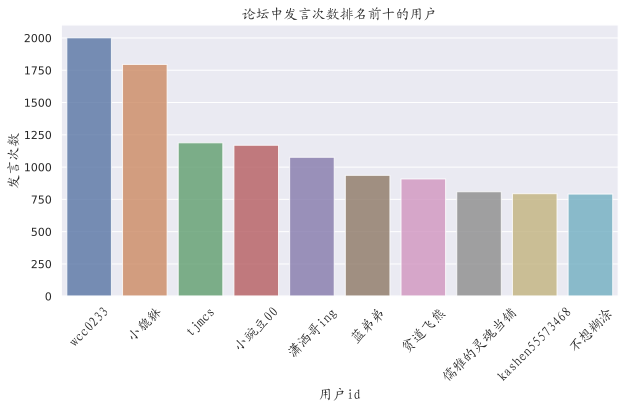

In [0]:
city_count  = df_cmb['author'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.set(font="simkai")
ax = sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('论坛中发言次数排名前十的用户',fontproperties=zhfont)
plt.ylabel('发言次数', fontsize=12,fontproperties=zhfont)
plt.xlabel('用户id', fontsize=12,fontproperties=zhfont)
ax.set_xticklabels(['wcc0233', '小貔貅', 'tjmcs', '小豌豆00', '潇洒哥ing', '蓝弟弟', '贫道飞熊', '儒雅的灵魂当铺', 'kashen55573468', '不想糊涂'],rotation=45,fontsize=10,fontproperties=zhfont) 
plt.show()

In [0]:
city_count.index

Index(['wcc0233', '小貔貅', 'tjmcs', '小豌豆00', '潇洒哥ing', '蓝弟弟', '贫道飞熊', '儒雅的灵魂当铺',
       'kashen55573468', '不想糊涂'],
      dtype='object')

In [0]:
df_cmb.describe()

,author,content,post_time,title,url
count,273159,263151,273159,273159,273159
unique,42917,223628,270307,16887,23258
top,wcc0233,恭喜,2019-6-18 18:45:23,【分享】招商银行稳定提额致当前卡片等级最高额度【亲测】,https://bbs.51credit.com/thread-5475817-1-1.html
freq,2001,1848,4,17064,21


In [0]:
df_cmb_main.head()

,title,author,content,post_time,url,time,year,month,dayofweek
0,--------关------------,kashen40272760,--------关------------,2019-3-11 19:52:01,https://bbs.51credit.com/thread-5262665-1-1.html,2019-03-11 19:52:01,2019,3,0
1,0.38的手续费,kashen92988369,给我20万的额度 让分24期0.38的费率 这个划算吗？年化合多少了？,2019-3-25 23:55:41,https://bbs.51credit.com/thread-5304311-1-1.html,2019-03-25 23:55:41,2019,3,0
2,0.53.费率分期合适吗,人潮拥挤我好多余,合理？？？？,2019-3-21 18:26:59,https://bbs.51credit.com/thread-5294135-1-1.html,2019-03-21 18:26:59,2019,3,3
3,0000000,夜猫孑,天天撸会进黑屋吗？,2019-4-16 20:34:10,https://bbs.51credit.com/thread-5357341-1-1.html,2019-04-16 20:34:10,2019,4,1
4,0001嘛时候放水啊,最下层卡友,中南白卡面太丑了，去星巴克兑星冰乐都不好意思拿出来,2019-7-16 04:02:10,https://bbs.51credit.com/thread-5551757-1-1.html,2019-07-16 04:02:10,2019,7,1


In [0]:
dict_starter = df_cmb_main.set_index('title')['author'].to_dict()
dict_starter

{'--------关------------': 'kashen40272760',
 '0.38的手续费': 'kashen92988369',
 '0.53.费率分期合适吗': '人潮拥挤我好多余',
 '0000000': '夜猫孑',
 '0001嘛时候放水啊': '最下层卡友',
 '001001是什么意思啊': '用生命在撸卡',
 '010网点进件申请银联白(持续更新)': '黑衣魔术师',
 '010，经典白能找业务员申请吗': 'a563618382',
 '02029859559这个是招商银行的电话嘛': '你牛回信',
 '020哪个商场卡员多': '目标一个亿',
 '020地区2019新春大礼包': 'kashen917',
 '020地区有没有申京东白条卡的，需要业务员上门吗？': 'csgxkjb',
 '020地标审核太慢了吧 都一个星期了': '蓝虎',
 '02138834600让明天在家等公安上门了': '用生命在撸卡',
 '023地区周末能到网点面签吗，': '我裂开了',
 '023有没有可以办卡的老哥': '追逐风的风筝',
 '024经典白现在什么要求了': 'kashen40005542',
 '026E无人破？？': 'good5206',
 '026E是不是大黑屋怎么破。': 'daydayupswing',
 '026这是大黑？一年没提了': '大神ok',
 '02781615555招行催收一天给我打了几十个电话': 'tiantianzi',
 '028区域上门面签后多久可以通过': 'kashen91924105',
 '028地区申卡如何不用上门呢？': '最爱大西瓜',
 '028已有9行.8k招行，招行代发工资这税后收入能曲线申请ae白或者经典白吗': '我不是卡神哈',
 '028高新区天府四街的招行！每天都从这里路过！': 'ys6859',
 '029地区现在不能下百夫长白金了吗？': 'yyyounglord',
 '0311地区哪个网点可以vtm搞金葵花大堂经理不管': 'CoinLG',
 '0351地区m+卡换卡': 'nasdkh',
 '0371哪里可以碰瓷经典白。。': 'QQ1404480580269',
 '0371哪里招行能进件经典白。': '宇宙无敌小衰哥',
 '03

In [0]:
df_cmb['starter'] = df_cmb['title'].apply(lambda x: dict_starter[x])
df_cmb.head()

,author,content,post_time,title,url,time,year,month,dayofweek,starter
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-21 00:45:42,2019,3,3,csgxkjb
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,2018-12-24 09:42:05,2018,12,0,渊太郎
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-21 09:43:45,2019,3,3,csgxkjb
3,chensy2009,NaN,2019-3-22 00:09:33,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-22 00:09:33,2019,3,4,csgxkjb
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,2018-12-24 09:44:07,2018,12,0,渊太郎


In [0]:
df_cmb['author'].nunique()

42917

In [0]:
df_cmb.sort_values('starter')

,author,content,post_time,title,url,time,year,month,dayofweek,starter
196433,kashen92027101,看我之前发的后续，现在经典白已经激活使用了，具体的你可以参考下，有的人说下卡银联白或者全币白...,2019-3-18 17:11:06,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-3-1.html,2019-03-18 17:11:06,2019,3,0,0593tang
196069,kashen92027101,听说经典白五月份后有可能要刚性年费，想了想还是不要犹豫了，2017年的时候有出过邀请经典白的...,2019-3-2 15:37:37,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-1-1.html,2019-03-02 15:37:37,2019,3,5,0593tang
196473,吹风的阳光,还没有结果？,2019-3-7 20:17:19,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-2-1.html,2019-03-07 20:17:19,2019,3,3,0593tang
196402,目标招行经典白,NaN,2019-3-7 14:05:39,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-2-1.html,2019-03-07 14:05:39,2019,3,3,0593tang
196452,kashen92027101,谢谢,2019-3-7 16:38:12,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-2-1.html,2019-03-07 16:38:12,2019,3,3,0593tang
196387,kashen92027101,昨晚才开始更新，目前在审核中,2019-3-7 12:32:03,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-2-1.html,2019-03-07 12:32:03,2019,3,3,0593tang
196444,凉城惜暖玉,祝你成功下卡,2019-3-7 16:11:43,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-2-1.html,2019-03-07 16:11:43,2019,3,3,0593tang
196453,目标招行经典白,NaN,2019-3-7 16:43:20,网点碰瓷经典白 目前 额度78k,https://bbs.51credit.com/thread-5242189-2-1.html,2019-03-07 16:43:20,2019,3,3,0593tang
84390,0593tang,求帮忙在线等,2019-3-21 14:42:04,拿银联白还是全币白碰经典白,https://bbs.51credit.com/thread-5293312-1-1.html,2019-03-21 14:42:04,2019,3,3,0593tang
84427,83355188,NaN,2019-3-21 15:44:03,拿银联白还是全币白碰经典白,https://bbs.51credit.com/thread-5293312-1-1.html,2019-03-21 15:44:03,2019,3,3,0593tang


In [0]:
!pip install python-igraph
!pip install cairocffi

     |████████████████████████████████| 378kB 10.1MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.7.1.post6-cp36-cp36m-linux_x86_64.whl size=2221024 sha256=25b8eb52e4ef030af563e587ff3c88839bc8a5670f2922d02fae046222856875
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eebae97e25f5b87d60f4c0687e00523e3f244fa41bc3f4a7
Successfully built python-igraph
     |████████████████████████████████| 71kB 8.3MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.0.2-cp36-none-any.whl size=88348 sha256=998351cca75af2844c9151d5a9a21c4c130e4d4eb3a76523b05671e9ffc7693d
  Stored in directory: /root/.cache/pip/wheels/e7/5d/6f/fc3c2364dfd3c4cfd15d786b156077c52209d9af45496fdf12
Successfully built cairocffi


In [0]:
df_cmb['relation'] = df_cmb.apply(lambda row: (row['author'],row['starter']), axis=1)
df_cmb.head()

,author,content,post_time,title,url,time,year,month,dayofweek,starter,relation
0,csgxkjb,有过QQ钱包卡的朋友吗？这个卡需要业务员上门吗？,2019-3-21 00:45:42,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-21 00:45:42,2019,3,3,csgxkjb,"(csgxkjb, csgxkjb)"
1,渊太郎,我21号网点PAD，到现在还是申请已受理，没有下文了~这是正常的么？一般转到审核，需要几天呀...,2018-12-24 09:42:05,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,2018-12-24 09:42:05,2018,12,0,渊太郎,"(渊太郎, 渊太郎)"
2,csgxkjb,申请过的朋友来说下。,2019-3-21 09:43:45,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-21 09:43:45,2019,3,3,csgxkjb,"(csgxkjb, csgxkjb)"
3,chensy2009,NaN,2019-3-22 00:09:33,有申请过QQ钱包卡的朋友吗？,https://bbs.51credit.com/thread-5291756-1-1.html,2019-03-22 00:09:33,2019,3,4,csgxkjb,"(chensy2009, csgxkjb)"
4,kashen07597615,我19号申请还是一样,2018-12-24 09:44:07,我21号网点PAD申请，到现在还是申请已受理，没有下文了~,https://bbs.51credit.com/thread-5087282-1-1.html,2018-12-24 09:44:07,2018,12,0,渊太郎,"(kashen07597615, 渊太郎)"


In [0]:
# df_cmb.to_csv('df_cmb_relation.csv', index=False)

In [0]:
# df_cmb_2019 = 

In [0]:
df_cmb_main.head()

,title,author,content,post_time,url,time,year,month,dayofweek
0,--------关------------,kashen40272760,--------关------------,2019-3-11 19:52:01,https://bbs.51credit.com/thread-5262665-1-1.html,2019-03-11 19:52:01,2019,3,0
1,0.38的手续费,kashen92988369,给我20万的额度 让分24期0.38的费率 这个划算吗？年化合多少了？,2019-3-25 23:55:41,https://bbs.51credit.com/thread-5304311-1-1.html,2019-03-25 23:55:41,2019,3,0
2,0.53.费率分期合适吗,人潮拥挤我好多余,合理？？？？,2019-3-21 18:26:59,https://bbs.51credit.com/thread-5294135-1-1.html,2019-03-21 18:26:59,2019,3,3
3,0000000,夜猫孑,天天撸会进黑屋吗？,2019-4-16 20:34:10,https://bbs.51credit.com/thread-5357341-1-1.html,2019-04-16 20:34:10,2019,4,1
4,0001嘛时候放水啊,最下层卡友,中南白卡面太丑了，去星巴克兑星冰乐都不好意思拿出来,2019-7-16 04:02:10,https://bbs.51credit.com/thread-5551757-1-1.html,2019-07-16 04:02:10,2019,7,1


In [0]:
url_list = [1,2,3,4,5]
1 in url_list

True

# 2019年7月份以后的新发帖用来做关系网络图

In [0]:
print(df_cmb.shape)

# 7月以后新发布的帖子的列表/set
title_list = df_cmb_main[(df_cmb_main.year == 2019) & (df_cmb_main.month >= 8)]['title'].tolist()

df_cmb['edge'] = df_cmb['title'].apply(lambda x: 1 if x in title_list else 0)

a = df_cmb[(df_cmb['edge'] == 1) & (df_cmb['starter'] != df_cmb['author'])]['relation'].tolist()

# a = df_cmb[(df_cmb['starter'] != df_cmb['author']) & (df_cmb.year == 2019) & (df_cmb.month >= 7)]['relation'].tolist()
print(len(a))
# 只有yiwan5个边

(273159, 12)
15881


In [0]:
df_cmb.isnull().sum()

author           0
content      10008
post_time        0
title            0
url              0
time             0
year             0
month            0
dayofweek        0
starter          0
relation         0
dtype: int64

In [0]:
import igraph
import cairocffi

# 创建一个空对象
g = igraph.Graph()

# 添加网络中的点——为所有参与讨论的人
vertex = list(set(df_cmb[(df_cmb.year == 2019) & (df_cmb.month >= 8)]['author'].tolist()))
g.add_vertices(vertex)

# 添加网络中的边——为帖子内参与评论的人与楼主之间的关系
# edges = list(set(df_cmb['relation'].tolist()[:50]))
edges = a

g.add_edges(edges)

In [0]:
len(vertex)
# 3500个节点、15881个边

3517

In [0]:
# !pip install cairocffi
# !pip install cairo
# !pip install libffi
# !pip install pycairo
# import igraph
# import cairocffi

In [0]:
# 对演员任务构建网络结构，因为人物太多，所以出现的结果展示效果太差
visual_style = {}

# 根据相对面积，设置点的大小
visual_style["vertex_size"] = 0.2
visual_style['edge_width'] = 0.02

# 布局方式
layout = g.layout('kk')
visual_style["layout"] = layout
# igraph.plot(g, layout)
igraph.plot(g,**visual_style,bbox=(0,0,1000,1000))

AttributeError: ignored

In [0]:
neighbors[:20].index

Index(['Tradition', 'wcc0233', '小貔貅', 'ylf18859180687', '潇洒哥ing', 'tjmcs',
       '小豌豆00', 'kashen02965798', '蓝弟弟', 'kashen20878647', '贫道飞熊', 'herscar',
       '不想糊涂', '儒雅的灵魂当铺', 'kashen55573468', '張儁傑', '清风明月过客归人', '颂绣华',
       '小童童童童话丶', 'good5206'],
      dtype='object')

[Text(0, 0, 'Tradition'),
 Text(0, 0, 'wcc0233'),
 Text(0, 0, '小貔貅'),
 Text(0, 0, 'ylf18859180687'),
 Text(0, 0, '潇洒哥ing'),
 Text(0, 0, 'tjmcs'),
 Text(0, 0, '小豌豆00'),
 Text(0, 0, 'kashen02965798'),
 Text(0, 0, '蓝弟弟'),
 Text(0, 0, 'kashen20878647'),
 Text(0, 0, '贫道飞熊'),
 Text(0, 0, 'herscar'),
 Text(0, 0, '不想糊涂'),
 Text(0, 0, '儒雅的灵魂当铺'),
 Text(0, 0, 'kashen55573468'),
 Text(0, 0, '张俊杰'),
 Text(0, 0, '清风明月过客归人'),
 Text(0, 0, '颂绣华'),
 Text(0, 0, '小童童童童话丶'),
 Text(0, 0, 'good5206')]

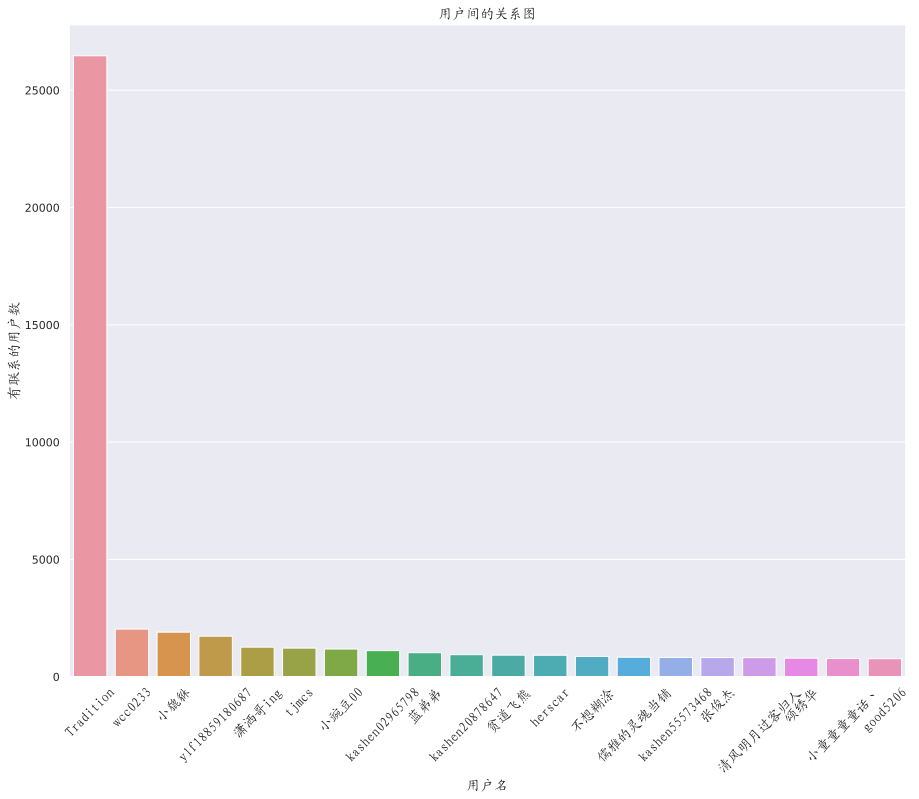

In [0]:
# 边的数量，用边衡量演员的合作数
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

all_name = list(set(df_cmb['author'].tolist()))

g.vs['label'] = all_name
numbers = g.degree()
neighbors = dict(zip(g.vs['label'], numbers))
neighbors = pd.Series(neighbors)
neighbors.sort_values(ascending=False,inplace=True)
plt.style.use({'figure.figsize':(15, 12)})
ax = sns.barplot(x = neighbors[:20].index,y=neighbors[:20])
plt.title('用户间的关系图',fontproperties=zhfont)
plt.ylabel('有联系的用户数', fontsize=12,fontproperties=zhfont)
plt.xlabel('用户名', fontsize=12,fontproperties=zhfont)
ax.set_xticklabels(['Tradition', 'wcc0233', '小貔貅', 'ylf18859180687', '潇洒哥ing', 'tjmcs','小豌豆00', 'kashen02965798', '蓝弟弟', 'kashen20878647', '贫道飞熊', 'herscar', '不想糊涂', '儒雅的灵魂当铺', 'kashen55573468', 'zjj', '清风明月过客归人', '颂绣华','小童童童童话丶', 'good5206'],rotation=45,fontsize=10,fontproperties=zhfont) 

In [0]:
ax.figure.savefig("用户关系图.jpg")

In [0]:
# 演员的中介作用，哪些演员更容易成为桥梁
# 中心作用越强的演员，说明其合作过的演员越多
betweenness = g.betweenness()
betweenness = [round(i, 2) for i in betweenness]
actor_betweenness = dict(zip(g.vs['label'], betweenness))
actor_betweenness = pd.Series(actor_betweenness).sort_values(ascending=False)
plt.style.use({'figure.figsize':(15, 12)})
x = actor_betweenness[:20].index

In [0]:
x

Index(['Tradition', 'ylf18859180687', 'wcc0233', 'kashen02965798', 'lxh654',
       'kashen20878647', '小貔貅', 'tjmcs', 'herscar', '不想糊涂', 'kashen55573468',
       'DingYi1314', '蓝弟弟', '我是有贷款的人', '随风而去', '潇洒哥ing', '浪翻云', 'zhkkk',
       '人江湖哪能不挨刀', 'baohua_2002'],
      dtype='object')

In [0]:
actor_betweenness[:20].values

array([6.46817827e+08, 3.79856659e+07, 3.04001931e+07, 2.15618316e+07,
       1.89839301e+07, 1.69581796e+07, 1.68257118e+07, 1.39991217e+07,
       1.33171651e+07, 1.04917420e+07, 9.55469877e+06, 9.05940460e+06,
       8.74396431e+06, 8.44827759e+06, 8.29522499e+06, 8.14087211e+06,
       8.03794908e+06, 7.67677021e+06, 7.14359063e+06, 6.86167786e+06])

[Text(0, 0, 'Tradition'),
 Text(0, 0, 'ylf18859180687'),
 Text(0, 0, 'wcc0233'),
 Text(0, 0, 'kashen02965798'),
 Text(0, 0, 'lxh654'),
 Text(0, 0, 'kashen20878647'),
 Text(0, 0, '小貔貅'),
 Text(0, 0, 'tjmcs'),
 Text(0, 0, 'herscar'),
 Text(0, 0, '不想糊涂'),
 Text(0, 0, 'kashen55573468'),
 Text(0, 0, 'DingYi1314'),
 Text(0, 0, '蓝弟弟'),
 Text(0, 0, '我是有贷款的人'),
 Text(0, 0, '随风而去'),
 Text(0, 0, '潇洒哥ing'),
 Text(0, 0, '浪翻云'),
 Text(0, 0, 'zhkkk'),
 Text(0, 0, '人江湖哪能不挨刀'),
 Text(0, 0, 'baohua_2002')]

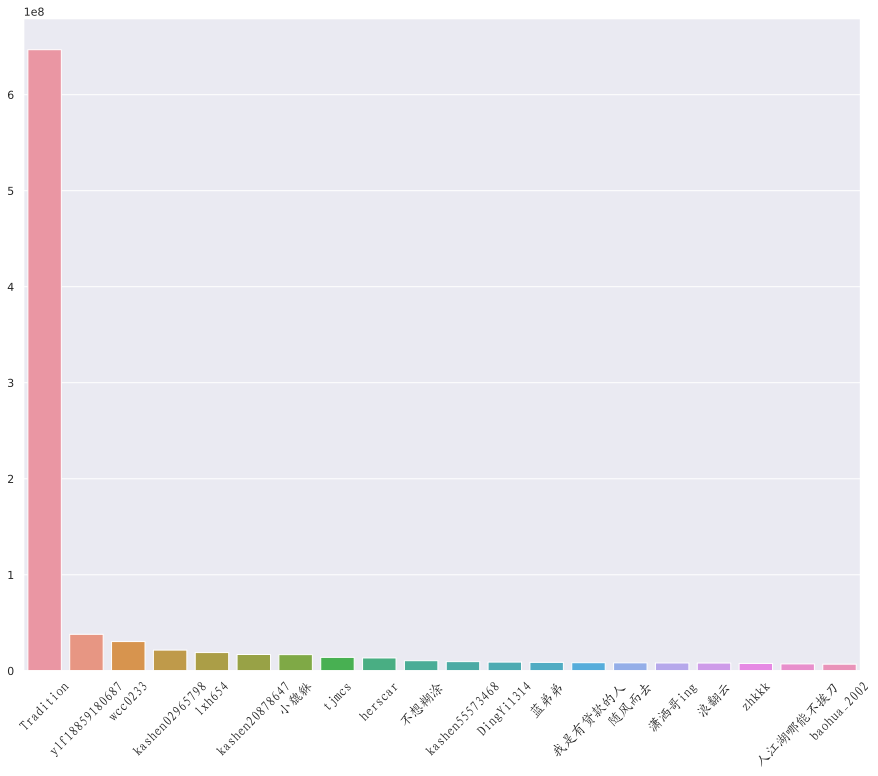

In [0]:
# 演员的中介作用，哪些演员更容易成为桥梁
# 中心作用越强的演员，说明其合作过的演员越多
# betweenness = g.betweenness()
# betweenness = [round(i, 2) for i in betweenness]
# actor_betweenness = dict(zip(g.vs['label'], betweenness))
# actor_betweenness = pd.Series(actor_betweenness).sort_values(ascending=False)
# plt.style.use({'figure.figsize':(15, 12)})
ax = sns.barplot(x = actor_betweenness[:20].index,y=actor_betweenness[:20])
ax.set_xticklabels(['Tradition', 'ylf18859180687', 'wcc0233', 'kashen02965798', 'lxh654',
       'kashen20878647', '小貔貅', 'tjmcs', 'herscar', '不想糊涂', 'kashen55573468',
       'DingYi1314', '蓝弟弟', '我是有贷款的人', '随风而去', '潇洒哥ing', '浪翻云', 'zhkkk',
       '人江湖哪能不挨刀', 'baohua_2002'],rotation=45,fontsize=10,fontproperties=zhfont) 

In [0]:
ax.figure.savefig("用户中介作用示意图.jpg")

In [0]:
# 演员聚类分析
import random
clusters = g.community_multilevel( weights=None, return_levels=False)
member = clusters.membership
new_cmap = ['#'+''.join([random.choice('0123456789abcdef') for x in range(6)]) for z in range(len(clusters))]

vcolors = {v: new_cmap[i] for i, c in enumerate(clusters) for v in c}
g.vs["color"] = [vcolors[v] for v in g.vs.indices]

ecolors = {e.index: new_cmap[member[e.tuple[0]]] if member[e.tuple[0]]==member[e.tuple[1]] else "#e0e0e0" for e in g.es}
g.es["color"] = [ecolors[e] for e in g.es.indices]

layout = g.layout('kk')
visual_style["layout"] = layout
visual_style["bbox"] = (0,0,1000,1000)

igraph.plot(g,'a.png', **visual_style)